In [6]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import panel as pn




In [7]:
df=pd.read_csv("C:/Users/DAYANITHI/Downloads/datasets/US_Accidents_Dec21_updated.csv")
df.head(1)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.23,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night


<AxesSubplot:>

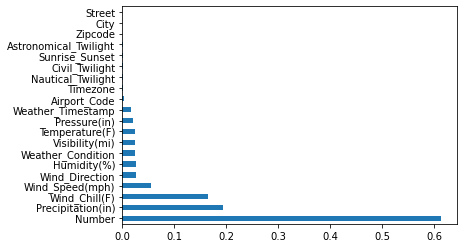

In [8]:
missing_percent=df.isna().sum().sort_values(ascending=False)/len(df) # sort values will give ascending order/ desecnding . 
missing_percent[missing_percent !=0].plot(kind='barh')#[missing_percent !=0] will give true/ false if they are 0.missing_percent[missing_percent !=0] gives columns with zeros 

State wise Insights

California,Florida,Texas are the state with most number of accidents in the country 
 
South Dakota,Vermont,Wyoming are the state with least number of accidents in the country (only these cities have accidents less than 1000)


<AxesSubplot:>

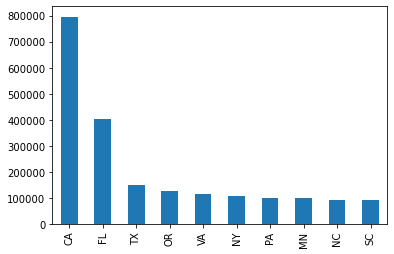

In [9]:
state=df.State.value_counts() 
state[:10].plot(kind='bar')

<AxesSubplot:>

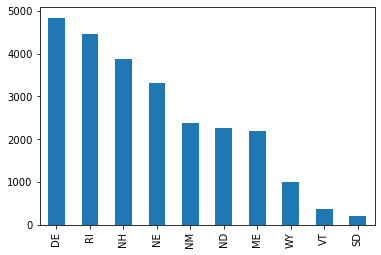

In [10]:
state[-10:].plot(kind='bar') 

County wise Insights 

<AxesSubplot:>

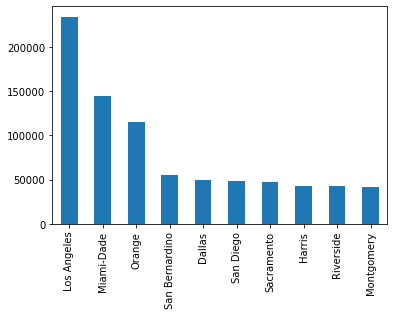

In [11]:
df.County.value_counts()[:10].plot(kind='bar')

<AxesSubplot:>

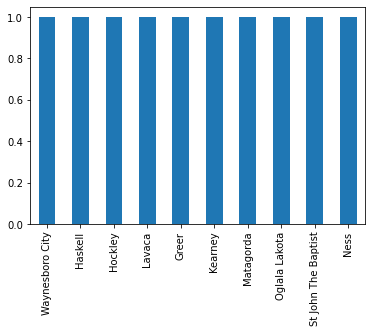

In [12]:
df.County.value_counts()[-10:].plot(kind='bar') #to get the county with least accidents 

City Insights

<AxesSubplot:>

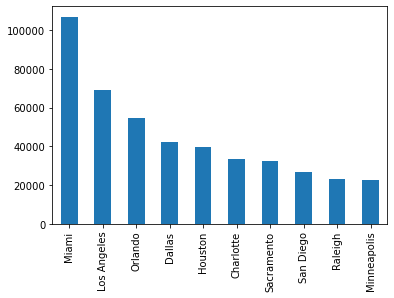

In [13]:
city_accidents=df['City'].value_counts() #top 10 cities with most accidents 
city_accidents[:10].plot(kind='bar')


<AxesSubplot:>

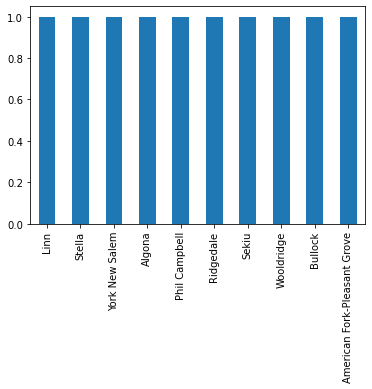

In [14]:
city_accidents[-10:].plot(kind='bar') # least 10 cities with acccidents 

C:\Users\DAYANITHI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

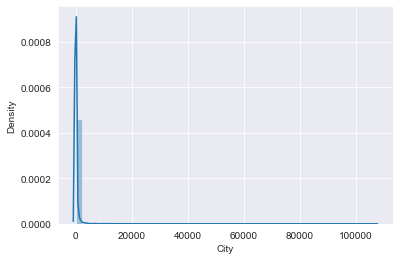

In [15]:
sns.set_style('darkgrid')
sns.distplot(city_accidents) # can infer that most common no.of accidents should be around 1000 since peak is close to 0 and divisions is in 20,000

In [16]:
high_accidents = city_accidents[city_accidents>=1000]
low_accidents = city_accidents[city_accidents<1000]
len(high_accidents)/len(df['City'].unique())  #dividing it by the len of unique cities will give the %  , approx 4.2% of cities have more than 1000 accidents 

0.04245848313644924

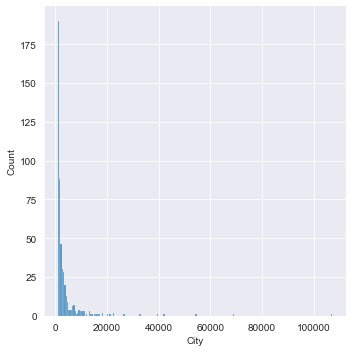

In [17]:
sns.displot(high_accidents)

In [18]:
df['Start_Time']=pd.to_datetime(df.Start_Time) # before doing pd.to_datetime Start_Time was an object. this will be a timestamp 
df['Start_Time'][0]

Timestamp('2016-02-08 00:37:08')

C:\Users\DAYANITHI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

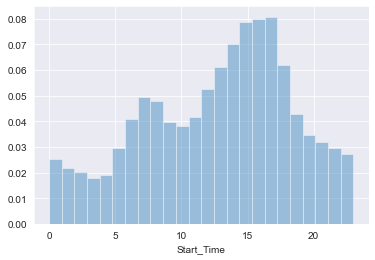

In [19]:
sns.distplot(df.Start_Time.dt.hour,bins=24,kde=False,norm_hist=True) #TO get the hours separately use dt.hour,heres bins =24 cuz 24hours in a days  
# most of the accidents occours between 15hrs to 18 hrs 
# next most will be from 6 hrs to 8hrs 

<AxesSubplot:xlabel='Start_Time'>

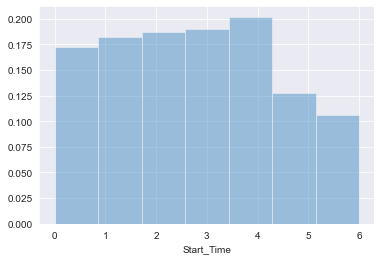

In [20]:
days=df.Start_Time.dt.day_of_week       # made a variable with days of the week
sns.distplot(days,bins=7,kde=False,norm_hist=True) #TO get the days separately use dt.day_of_week , heres bins =7 cuz 7 days in a week 

<AxesSubplot:xlabel='Start_Time'>

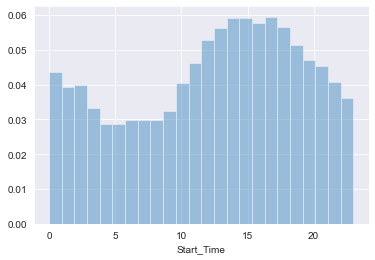

In [21]:
sunday=df.Start_Time[days==6]               # took out sunday alone 
sns.distplot(sunday.dt.hour,bins=24,kde=False,norm_hist=True)  #plotting for hours in sunday at which accidents happen (sunday.dt.hour)
#sundays peak accident prone hours are from 14 hrs to 18 hrs 

<AxesSubplot:xlabel='Start_Time'>

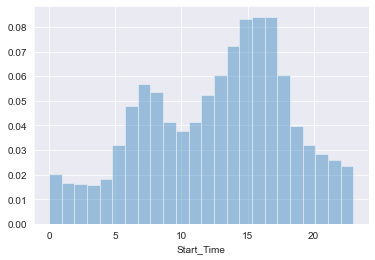

In [22]:
monday=df.Start_Time[days==0]               # took out sunday alone 
sns.distplot(monday.dt.hour,bins=24,kde=False,norm_hist=True)  #plotting for hours in sunday at which accidents happen (sunday.dt.hour)

<AxesSubplot:xlabel='Start_Time'>

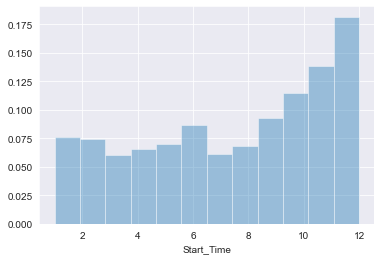

In [23]:
sns.distplot(df.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)  #plottig for the month when mst accidents take place .

Text(0.5, 1.0, 'WindSpeed')

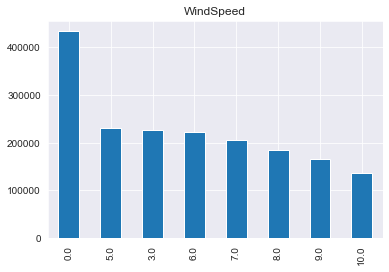

In [24]:
df['Wind_Speed(mph)'].value_counts()[:10].plot(kind='bar').set_title("WindSpeed")

<AxesSubplot:ylabel='Weather_Condition'>

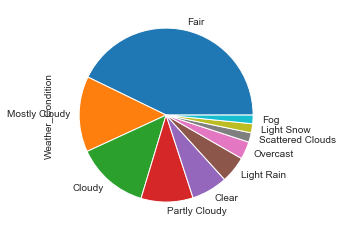

In [25]:
df['Weather_Condition'].value_counts()[:10].plot(kind='pie')

<AxesSubplot:ylabel='Side'>

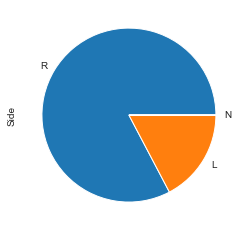

In [26]:
df.Side.value_counts().plot(kind='pie')

In [27]:
tab=pd.crosstab(df['Stop'],df['Railway'])

In [28]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

<AxesSubplot:xlabel='Timezone'>

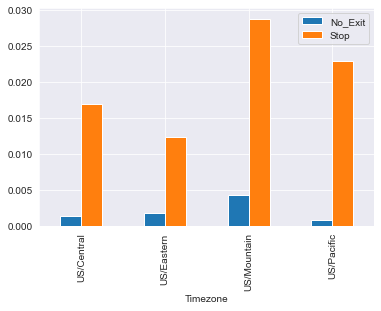

In [29]:
sb=df.groupby('Timezone').agg({'No_Exit':'mean','Stop':'mean'})
sb.plot(kind='bar')

In [32]:
df.Roundabout.value_counts()

False    2845219
True         123
Name: Roundabout, dtype: int64

In [33]:
pd.crosstab(df['Roundabout'],df['Railway'])

Railway,False,True
Roundabout,,
False,2822588,22631
True,123,0


In [ ]:
df.groupby(['Wind_Direction'])['Wind_Speed(mph)'].plot(kind='bar')

In [ ]:
df.info()

In [ ]:
pn.extension()

window = pn.widgets.IntSlider(name='window', value=30, start=1, end=60)
sigma = pn.widgets.IntSlider(name='sigma', value=10, start=0, end=20)

interactive = pn.bind(high_accidents , window=window, sigma=sigma)

In [ ]:
first_app = pn.Column(window, sigma, interactive)

first_app